# Exploratory Data Analysis

In [1]:
import warnings
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the data
df = pd.read_csv('../data/mission_hospital_cleaned.csv')

In [3]:
#check if there is missing value and datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   AGE                           240 non-null    float64
 1   GENDER                        240 non-null    object 
 2   MARITAL STATUS                240 non-null    object 
 3   KEY COMPLAINTS-CODE           240 non-null    object 
 4   BODY WEIGHT                   240 non-null    float64
 5   BODY HEIGHT                   240 non-null    float64
 6   HR PULSE                      240 non-null    int64  
 7   BP-HIGH                       240 non-null    float64
 8   BP-LOW                        240 non-null    float64
 9   RR                            240 non-null    int64  
 10  PAST MEDICAL HISTORY CODE     240 non-null    object 
 11  HB                            240 non-null    float64
 12  UREA                          240 non-null    float64
 13  CREAT

In [4]:
#explore the first few rows
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS-CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP-HIGH,BP-LOW,RR,...,CREATININE,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY-ICU,LENGTH OF STAY-WARD,IMPLANT USED (Y/N),COST OF IMPLANT
0,58.0,M,MARRIED,other- heart,49.2,160.0,118,100.0,80.0,32,...,0.8,AMBULANCE,ALERT,EMERGENCY,660293.0,25,12,13,Y,38000
1,59.0,M,MARRIED,CAD-DVD,41.0,155.0,78,70.0,50.0,28,...,1.7,AMBULANCE,ALERT,EMERGENCY,809130.0,41,20,21,Y,39690
2,82.0,M,MARRIED,CAD-TVD,46.6,164.0,100,110.0,80.0,20,...,0.8,WALKED IN,ALERT,ELECTIVE,362231.0,18,9,9,N,0
3,46.0,M,MARRIED,CAD-DVD,80.0,173.0,122,110.0,80.0,24,...,1.5,AMBULANCE,ALERT,EMERGENCY,629990.0,14,13,1,Y,89450
4,60.0,M,MARRIED,CAD-DVD,58.0,175.0,72,180.0,100.0,18,...,1.9,AMBULANCE,ALERT,EMERGENCY,444876.0,24,12,12,N,0


In [5]:
#Body Height and Weight alone my not be useful so body mass index (BMI) is a better indicator of health
df['BMI']=df['BODY WEIGHT']/((df['BODY HEIGHT']/100)**2)
df.head()

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS-CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP-HIGH,BP-LOW,RR,...,MODE OF ARRIVAL,STATE AT THE TIME OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY-ICU,LENGTH OF STAY-WARD,IMPLANT USED (Y/N),COST OF IMPLANT,BMI
0,58.0,M,MARRIED,other- heart,49.2,160.0,118,100.0,80.0,32,...,AMBULANCE,ALERT,EMERGENCY,660293.0,25,12,13,Y,38000,19.218750
1,59.0,M,MARRIED,CAD-DVD,41.0,155.0,78,70.0,50.0,28,...,AMBULANCE,ALERT,EMERGENCY,809130.0,41,20,21,Y,39690,17.065557
2,82.0,M,MARRIED,CAD-TVD,46.6,164.0,100,110.0,80.0,20,...,WALKED IN,ALERT,ELECTIVE,362231.0,18,9,9,N,0,17.325996
3,46.0,M,MARRIED,CAD-DVD,80.0,173.0,122,110.0,80.0,24,...,AMBULANCE,ALERT,EMERGENCY,629990.0,14,13,1,Y,89450,26.729927
4,60.0,M,MARRIED,CAD-DVD,58.0,175.0,72,180.0,100.0,18,...,AMBULANCE,ALERT,EMERGENCY,444876.0,24,12,12,N,0,18.938776


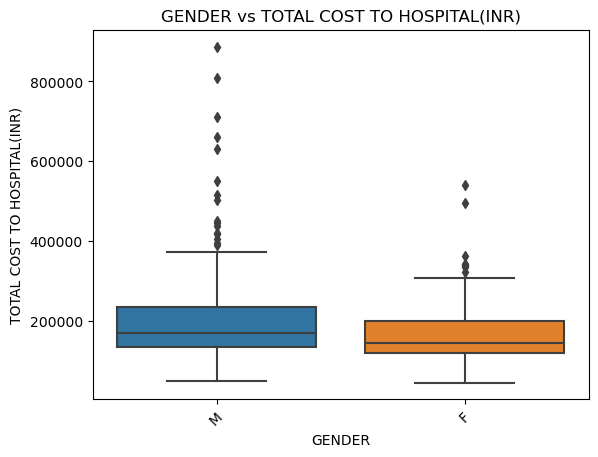

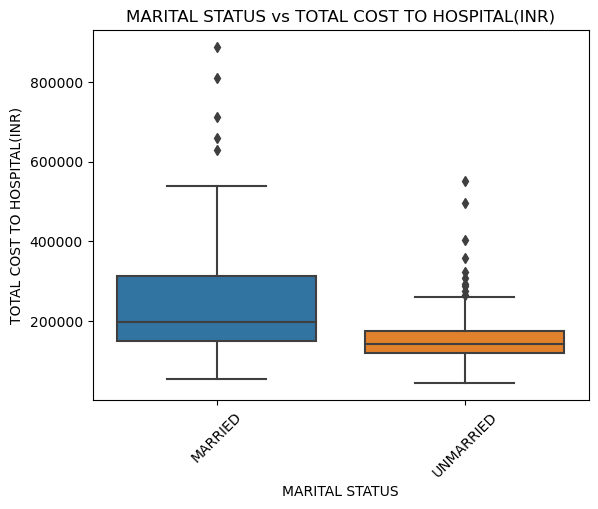

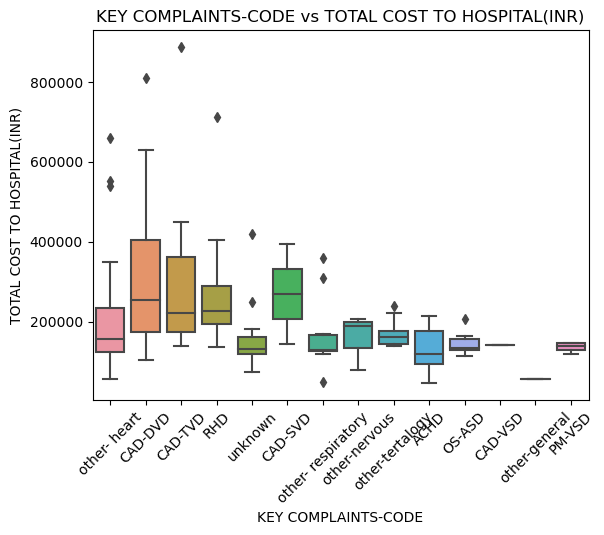

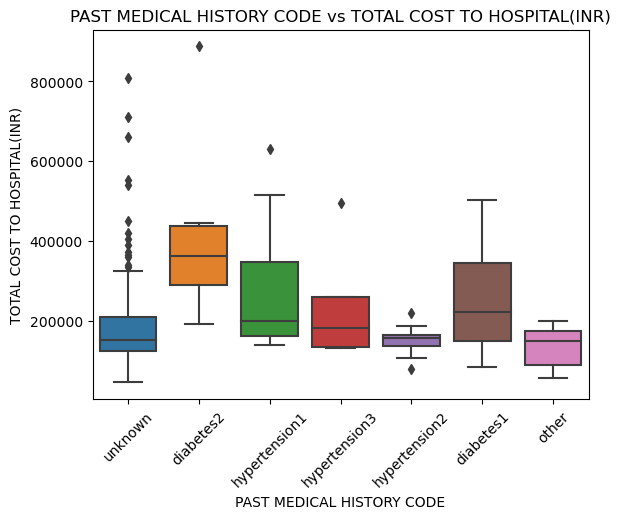

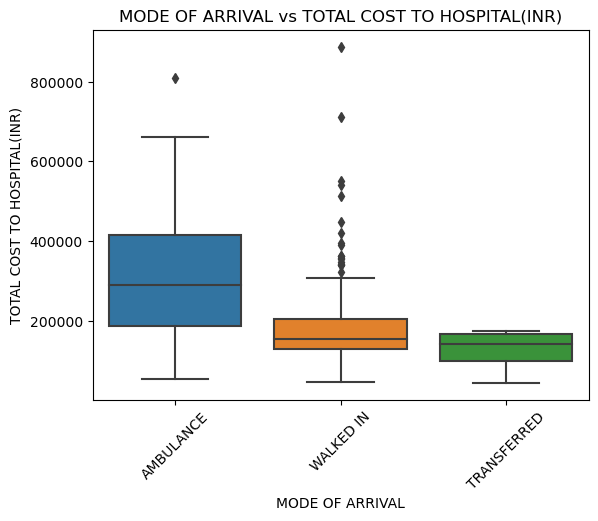

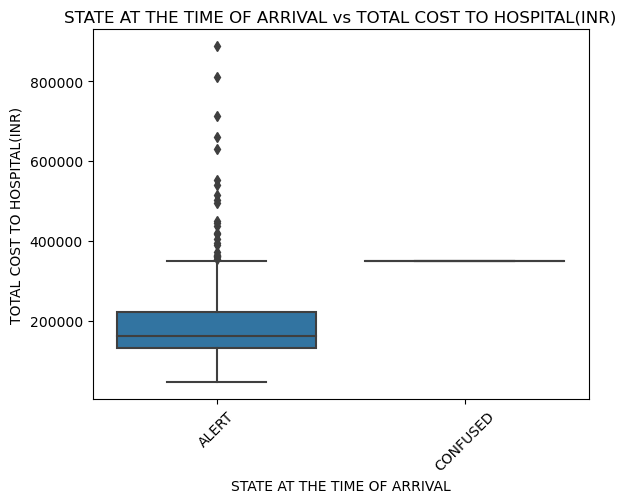

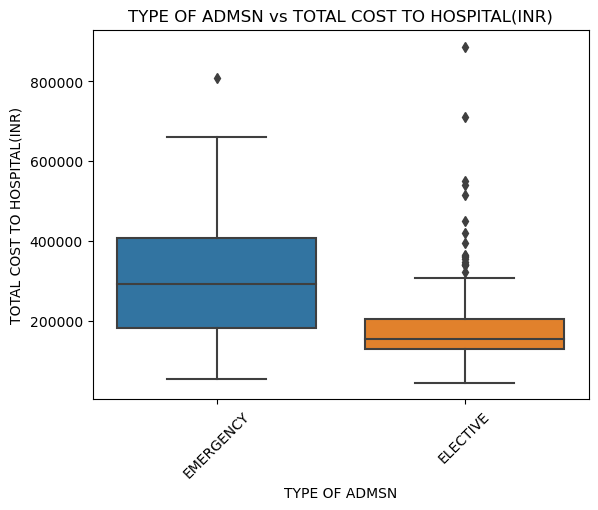

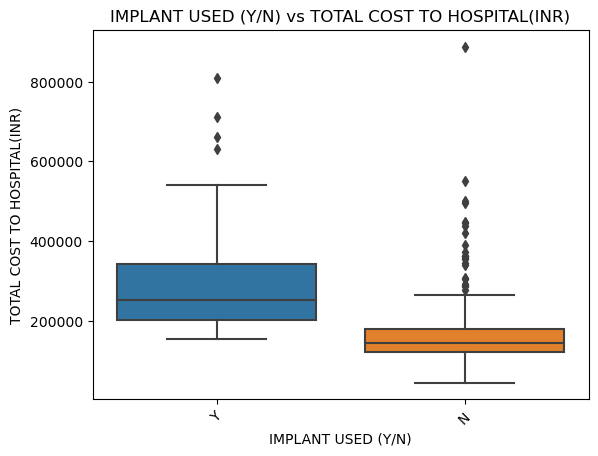

In [6]:
#We observe our categorigal variable relationships to our dependent variable
warnings.simplefilter(action='ignore', category=FutureWarning)

for col in df.columns:
    if df[col].dtype == 'object':
        sns.boxplot(x=col, y='TOTAL COST TO HOSPITAL', data=df)
        plt.xticks(rotation=45)
        plt.xlabel(col)
        plt.ylabel('TOTAL COST TO HOSPITAL(INR)' )
        plt.title(f'{col} vs TOTAL COST TO HOSPITAL(INR)')
        plt.show()

From our bar graphs we see that female patients has lower total cost compared to male patients. We also see that married couples have more total cost than unnmarried couples. Coronary Artery Disease related patients (CAD-SVD, CAD-TVD, CAD-DVD) has three of the top four total cost. Patients with the past history of diabetes2 has the highest total cost. Even though Ambulance patients has higher median total cost, walk-in patients has a lot of outliers in the high end of total cost. It seems only one patient arrived confused. Although Emergency patients show higher median total cost, elective patients have a lot of outliers in the higher end. Similary patients with implats show higher total cost but there a lot of higher end outliers for non-implant patients. overall all the categorical variable except state at the time of arrival seems to show some variations; therefore we're going to keep all the categorical variables except state at the time of arrival.   

In [7]:
df.drop(columns=['STATE AT THE TIME OF ARRIVAL'], inplace=True)

In [8]:
#We cannot really differentiate between other-general and unknown KEY COMPLAINTS-CODE we put them under one category
df['KEY COMPLAINTS-CODE'] = df['KEY COMPLAINTS-CODE'].str.replace('unknown', 'other-general')
df['KEY COMPLAINTS-CODE'].unique()

array(['other- heart', 'CAD-DVD', 'CAD-TVD', 'RHD', 'other-general',
       'CAD-SVD', 'other- respiratory', 'other-nervous',
       'other-tertalogy', 'ACHD', 'OS-ASD', 'CAD-VSD', 'PM-VSD'],
      dtype=object)

We don't do the same for past medical history because we interprate other as has having other past medical history but unknown as uknown whether that patient as past medical history or not

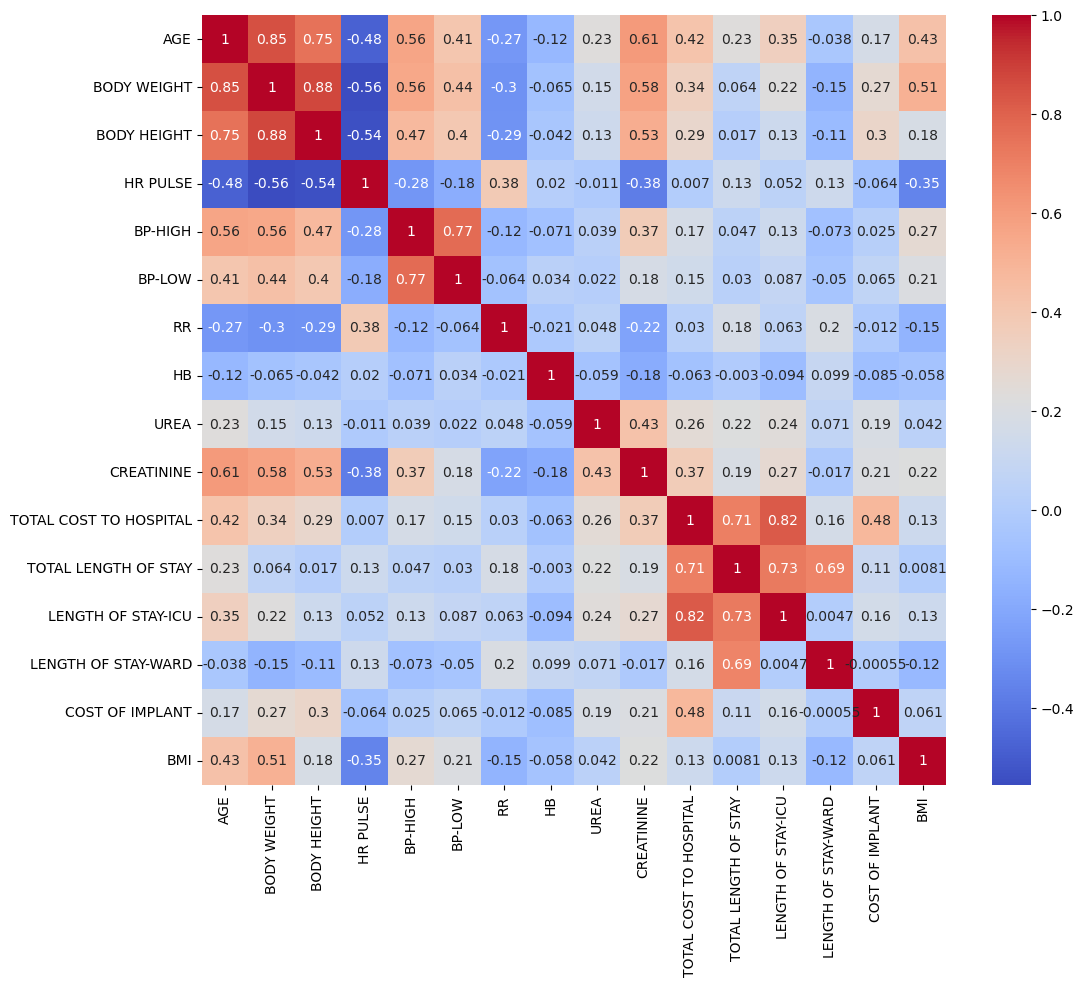

In [9]:
#We observe the correlation between numerical variables.
plt.subplots(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=['number']).corr(), cmap='coolwarm', annot=True);

The total cost has strong positive correlation with length of stay at ICU and total length of stay. The total cost has moderate positive correlation with cost of implant and age. Now let visualize our numerical variables vs total cost of hospital with scatter plot

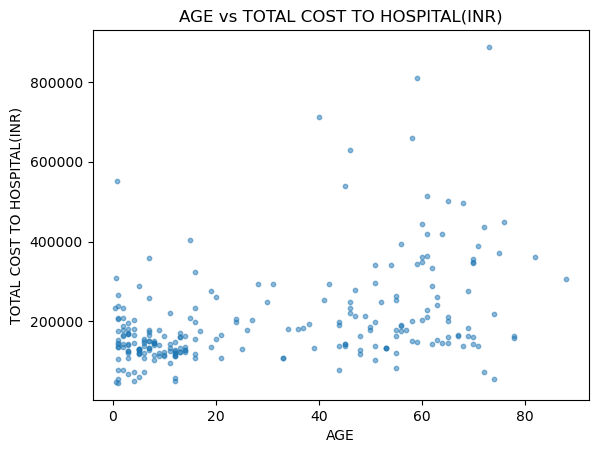

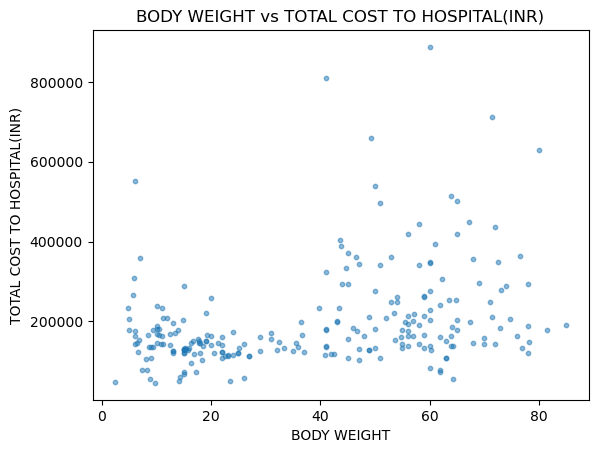

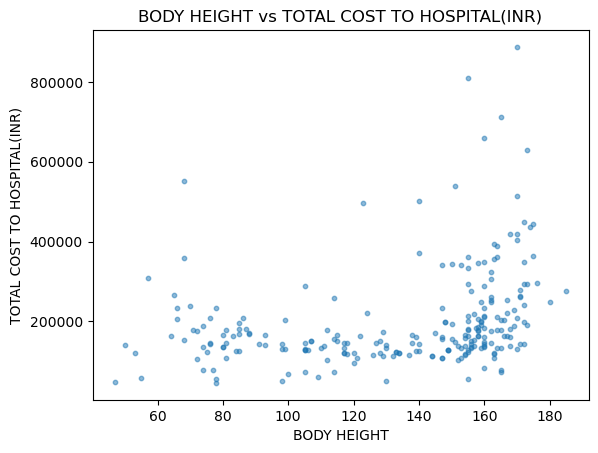

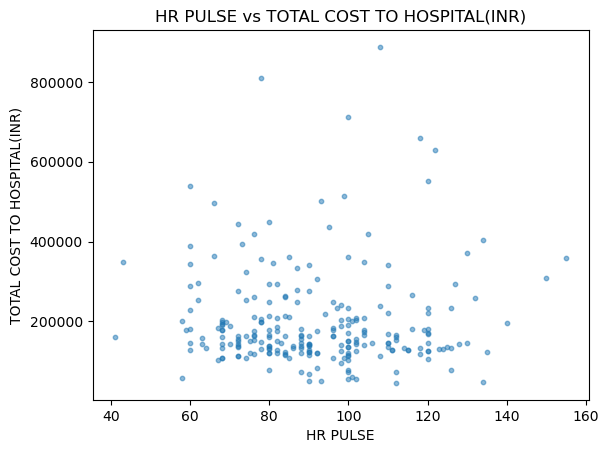

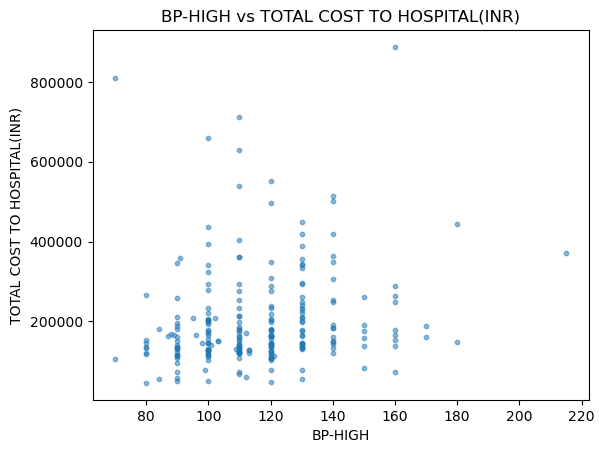

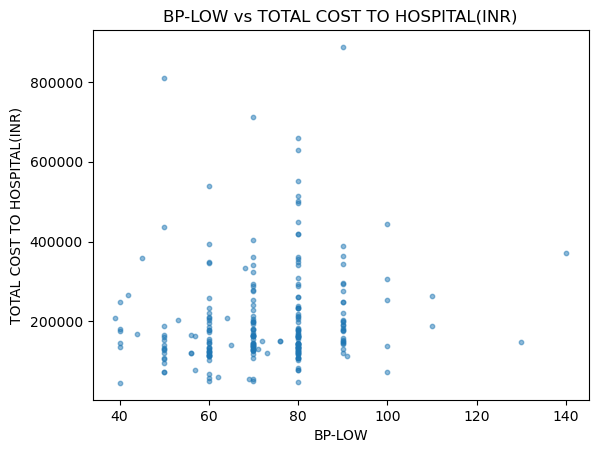

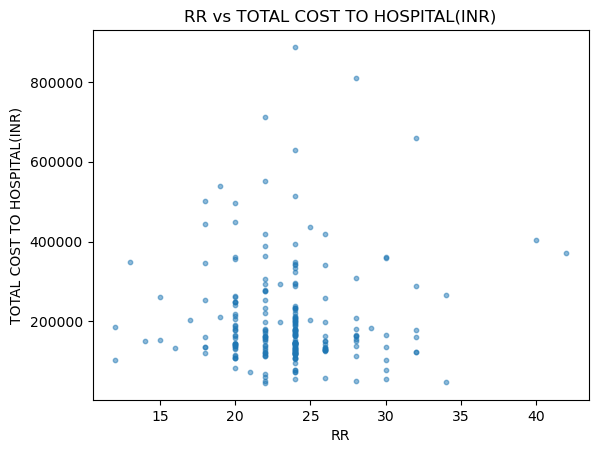

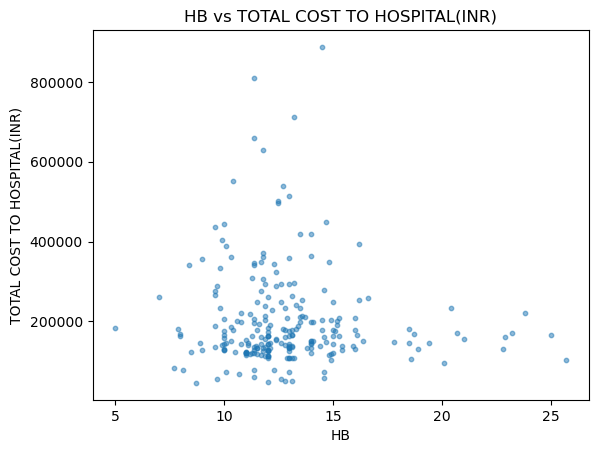

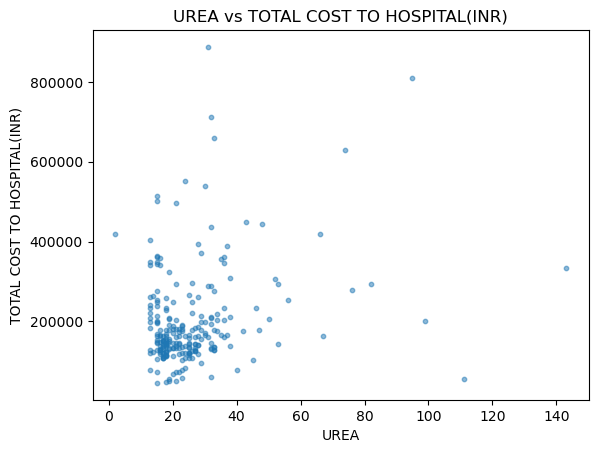

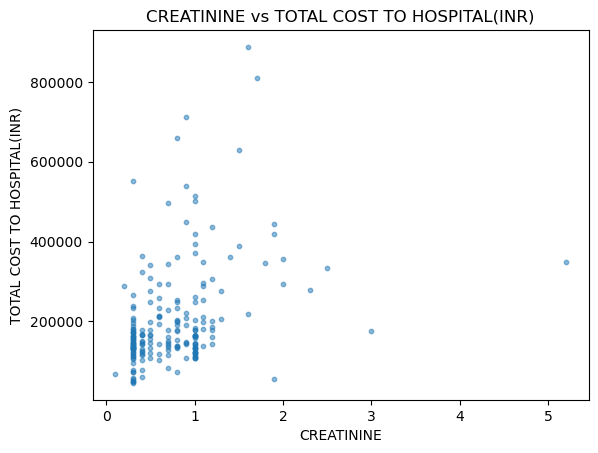

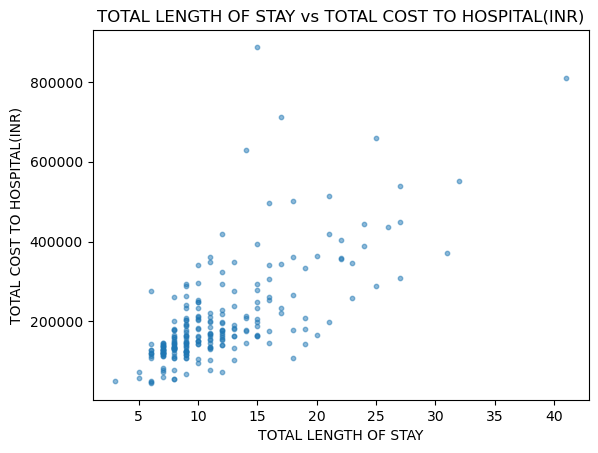

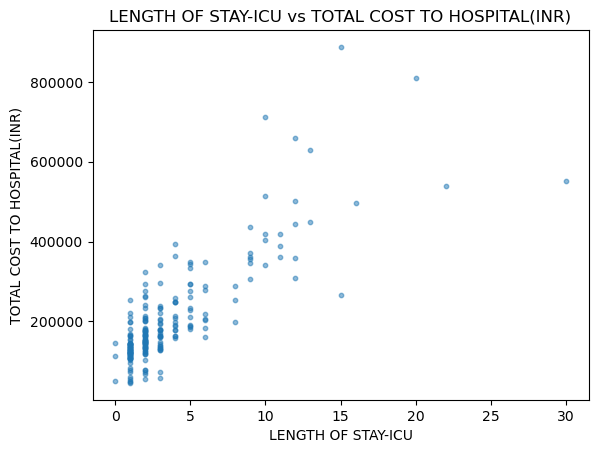

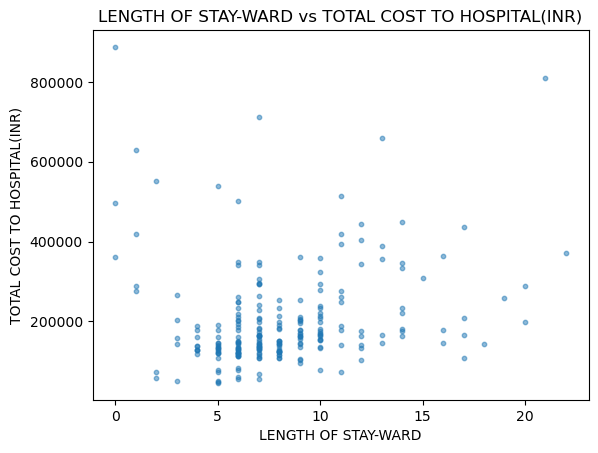

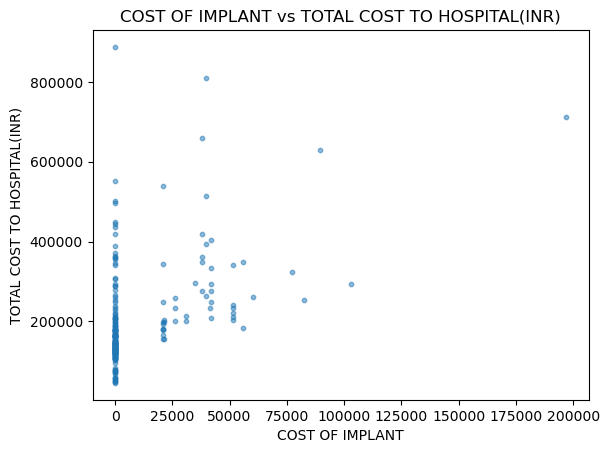

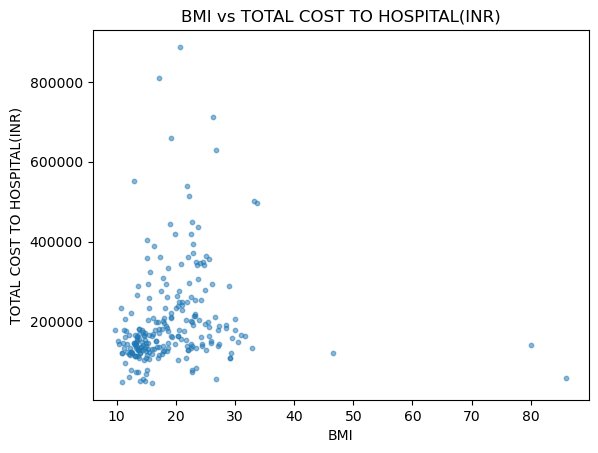

In [10]:
for col in df.columns:
    if df[col].dtype != 'object' and col != 'TOTAL COST TO HOSPITAL':
        plt.scatter(x=df[col], y=df['TOTAL COST TO HOSPITAL'], s=10, alpha=0.5)
        
        plt.xlabel(col)
        plt.ylabel('TOTAL COST TO HOSPITAL(INR)' )
        plt.title(f'{col} vs TOTAL COST TO HOSPITAL(INR)')
        plt.show()

We were able to veryfy our strong relationship with scatterplot but we were not able to see our moderate relationships on the scatterplot

In [11]:
#some of the BMI values seems unrealistic
df[df['BMI']> 50]

,AGE,GENDER,MARITAL STATUS,KEY COMPLAINTS-CODE,BODY WEIGHT,BODY HEIGHT,HR PULSE,BP-HIGH,BP-LOW,RR,...,CREATININE,MODE OF ARRIVAL,TYPE OF ADMSN,TOTAL COST TO HOSPITAL,TOTAL LENGTH OF STAY,LENGTH OF STAY-ICU,LENGTH OF STAY-WARD,IMPLANT USED (Y/N),COST OF IMPLANT,BMI
159,9.0,F,UNMARRIED,OS-ASD,20.0,50.0,90,110.0,65.0,24,...,0.3,WALKED IN,ELECTIVE,141232.17,12,1,12,N,0,80.000000
196,12.0,F,UNMARRIED,other- heart,26.0,55.0,58,90.0,60.0,26,...,0.3,WALKED IN,ELECTIVE,58943.00,5,3,2,N,0,85.950413


In [12]:
#The height seem in inches so convert them to cm
df.loc[df['BMI'] > 50, 'BODY HEIGHT'] = round(df.loc[df['BMI'] > 50, 'BODY HEIGHT'] * 2.54)

In [13]:
df.to_csv('../data/mission_hospital_cleaned2.csv', index=False)